# Plotting ERA5 Data using GEOCAT

These notebook is showing the usage of the module libDATA2 that uses xarray and
cartopy together as reorganized by GEOCAT

libDATA2 is a submodule of the Zapata system of visualization and file handling applications.

In [23]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt 
import scipy.linalg as sc
import numpy.linalg as lin
from scipy import stats
import xarray as xr
import pandas as pd
import cartopy.crs as car

import lib
import zapata.data as era
import zapata.mapping as zmap
import zapata.computation as zcom
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## read a single Xarray using read_xarray

In [2]:
#ds=era.read_xarray(dataset='ERA5',var='Z',level='200',season='DJF')
# Import an NCL colormap
BYR = gvcmaps.BlueYellowRed

In [3]:
# Create datasets from one variable
# xr.Dataset({'SST': ds})

## Read DataSetdirectly using read_datasets

In [4]:
dd=era.read_dataset(dataset='ERA5',var='Z',level='200',season='DJF',verbose=False)

In [5]:
# Extract a slice of the data
T = dd.Z.sel(time=slice('1979-01-01', '1979-01-01'), lat = slice(30,-30), lon = slice(60,270))
Tglob=dd.Z.sel(time=slice('1979-01-01', '1979-01-01'))
Tglob2=dd.Z.sel(time=slice('1990-01-01', '1990-01-01'))
Tmean = dd.Z.mean(dim='time')/10.
Teddy=Tmean - Tmean.mean(dim='lon')
# Smooth the 500-hPa geopotential height field
# Be sure to only smooth the 2D field


 Opening figure , 2 rows and 1 cols 

Number of Contours  15


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  -200   to 200  with interval   40


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


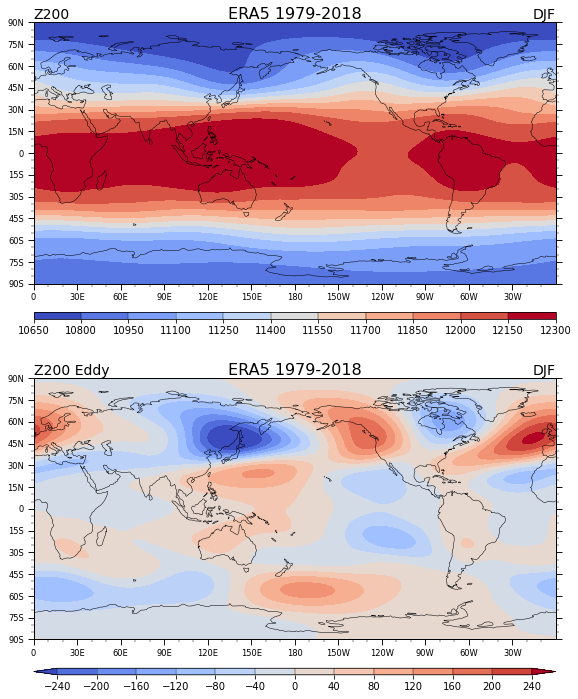

In [24]:
#Example Two Plots
bigtit = 'ERA5 1979-2018'
right='DJF'
left1 = 'Z200'
left2 = 'Z200 Eddy'
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(Tmean, [15], pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right,cmap='coolwarm')
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(zcom.smooth_xarray(Teddy), [-200,200,40], pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left2,righttitle=right,cmap='coolwarm')
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('Z200.pdf')
plt.show()

In [7]:
#Plot Zonal Wind
UW=era.read_dataset(dataset='ERA5',var='U',level='200',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='U',level='200',season='JJA',verbose=False)
UWmean = UW.U.mean(dim='time')
USmean = US.U.mean(dim='time')

 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  -10   to 70  with interval   10


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  -10   to 70  with interval   10


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


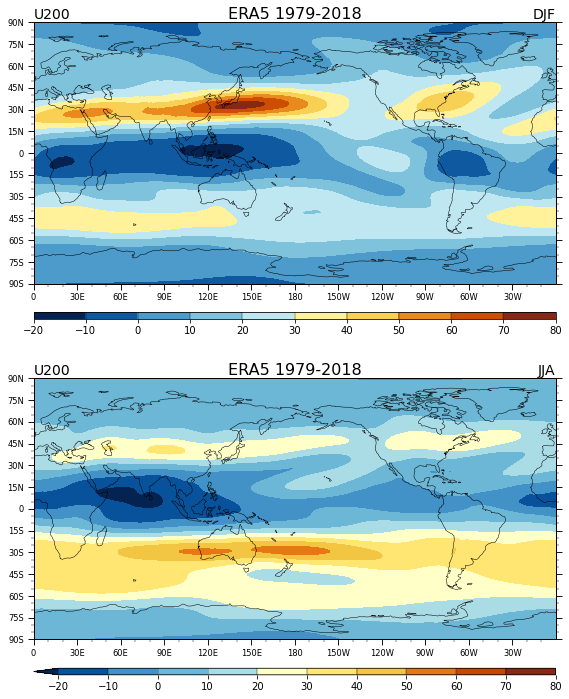

In [8]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'U200'
color_map=BYR
cont1 = [ -10, 70, 10]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('U200.pdf')
plt.show()

In [9]:
#Plot Meridional Wind
UW=era.read_dataset(dataset='ERA5',var='V',level='200',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='V',level='200',season='JJA',verbose=False)
UWmean = UW.V.mean(dim='time')
USmean = US.V.mean(dim='time')

 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  -15   to 15  with interval   3.0


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  -15   to 15  with interval   3.0


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


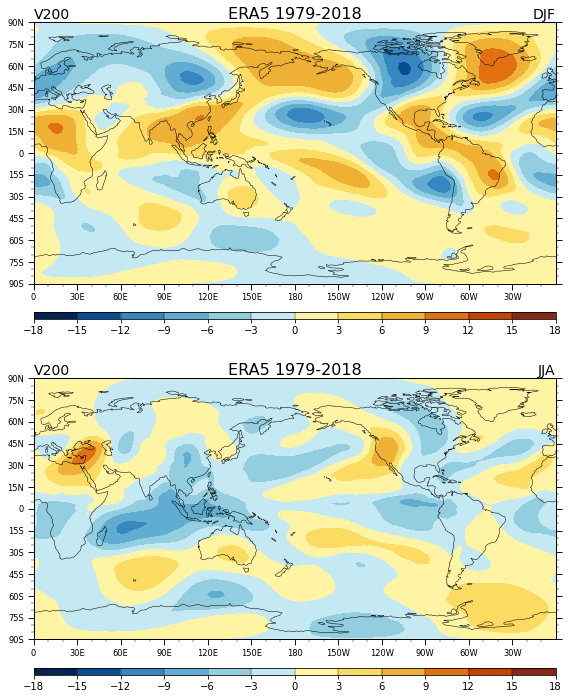

In [10]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'V200'
color_map=BYR
cont1 = [ -15,15,3.]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('V200.pdf')
plt.show()

In [11]:
#Plot U Surface Wind
UW=era.read_dataset(dataset='ERA5',var='U',level='1000',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='U',level='1000',season='JJA',verbose=False)
UWmean = UW.U.mean(dim='time')
USmean = US.U.mean(dim='time')

 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  -15   to 15  with interval   2.0


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  -15   to 15  with interval   2.0


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


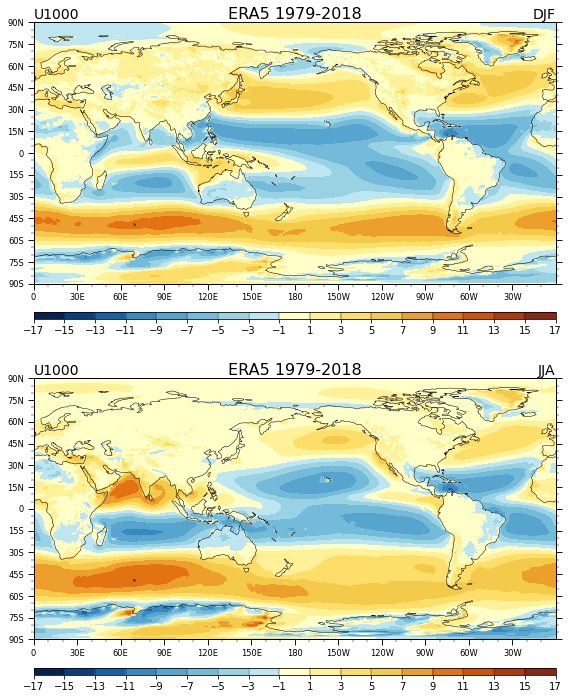

In [12]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'U1000'
color_map=BYR
cont1 = [ -15,15,2.]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('U1000.pdf')
plt.show()

In [13]:
#Plot U Surface Wind
UW=era.read_dataset(dataset='ERA5',var='V',level='1000',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='V',level='1000',season='JJA',verbose=False)
UWmean = UW.V.mean(dim='time')
USmean = US.V.mean(dim='time')

 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  -15   to 15  with interval   2.0


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  -15   to 15  with interval   2.0


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


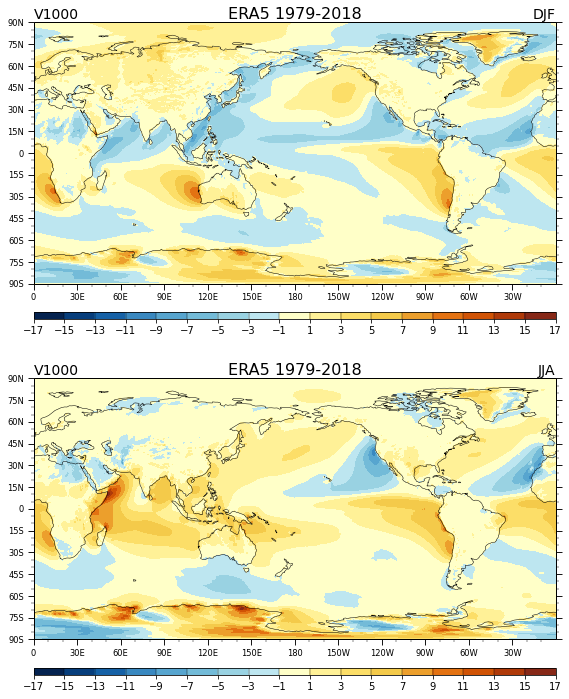

In [14]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'V1000'
color_map=BYR
cont1 = [ -15,15,2.]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('V1000.pdf')
plt.show()

In [25]:
#Plot U Surface Wind
UW=era.read_dataset(dataset='ERA5',var='MSL',level='SURF',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='MSL',level='SURF',season='JJA',verbose=False)
UWmean = zcom.smooth_xarray(UW.MSL.mean(dim='time'),sigma=5,order=0)/100 - 1000
USmean = zcom.smooth_xarray(US.MSL.mean(dim='time'),sigma=5,order=0)/100 - 1000

 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  -30   to 30  with interval   5


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  -30   to 30  with interval   5


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


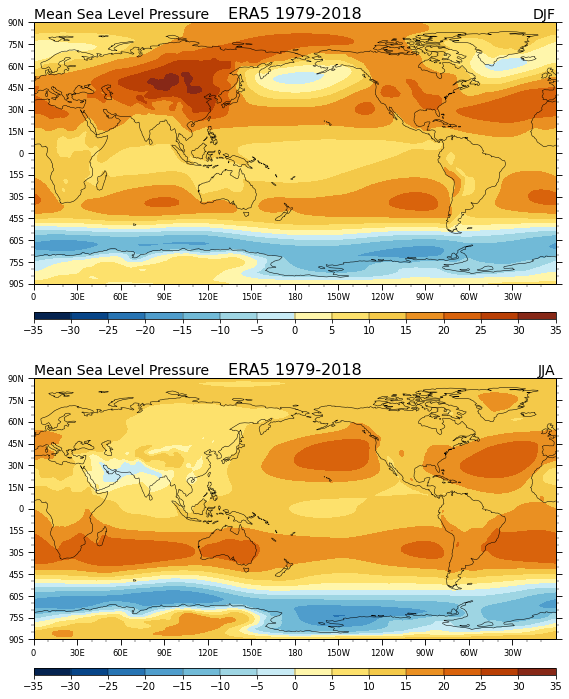

In [26]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'Mean Sea Level Pressure'
color_map=BYR
cont1 = [ -30,30,5]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('MSL.pdf')
plt.show()

In [17]:
#Plot SST
UW=era.read_dataset(dataset='ERA5',var='SST',level='SURF',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='SST',level='SURF',season='JJA',verbose=False)
UWmean = (UW.where(UW != 9999.)).SST.mean(dim='time') -273.16
USmean = (US.where(US != 9999.)).SST.mean(dim='time') -273.16

/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


 Opening figure , 2 rows and 1 cols 

Setting Fixed Contours
 Contouring from  2   to 30  with interval   2


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
Setting Fixed Contours
 Contouring from  2   to 30  with interval   2


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


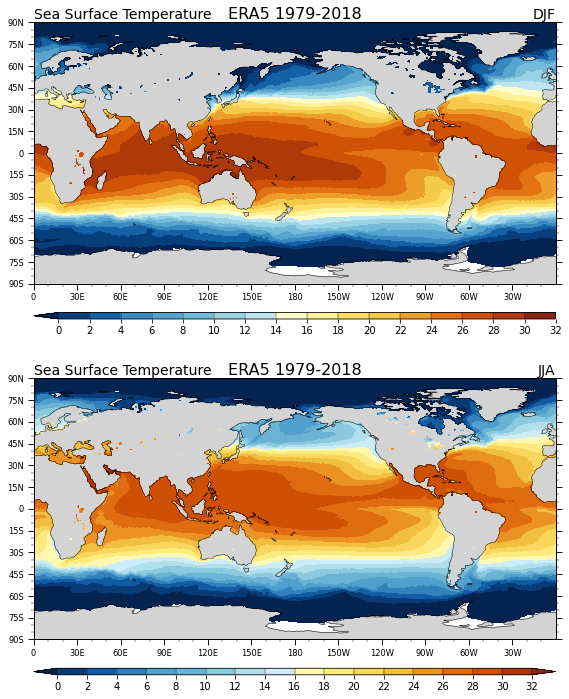

In [18]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'Sea Surface Temperature'
color_map=BYR
cont1 = [2,30,2 ]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,coasts=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,coasts=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('SST.pdf')
plt.show()

In [19]:
#Plot SST
UW=era.read_dataset(dataset='GPCP',var='precip',level='SURF',season='DJF',verbose=False)
US=era.read_dataset(dataset='GPCP',var='precip',level='SURF',season='JJA',verbose=False)
UWmean = UW.precip.mean(dim='time')
USmean = US.precip.mean(dim='time')

  Special Value not defined for dataset GPCP
  Special Value not defined for dataset GPCP


 Opening figure , 2 rows and 1 cols 

Fixed Contours to.. [0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 7.5, 9.0, 11.0, 13.0]


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-178.75, 178.75)  
 Plotting with y limits (-88.75, 88.75)  
Fixed Contours to.. [0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 7.5, 9.0, 11.0, 13.0]


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


 Plotting with x limits (-178.75, 178.75)  
 Plotting with y limits (-88.75, 88.75)  


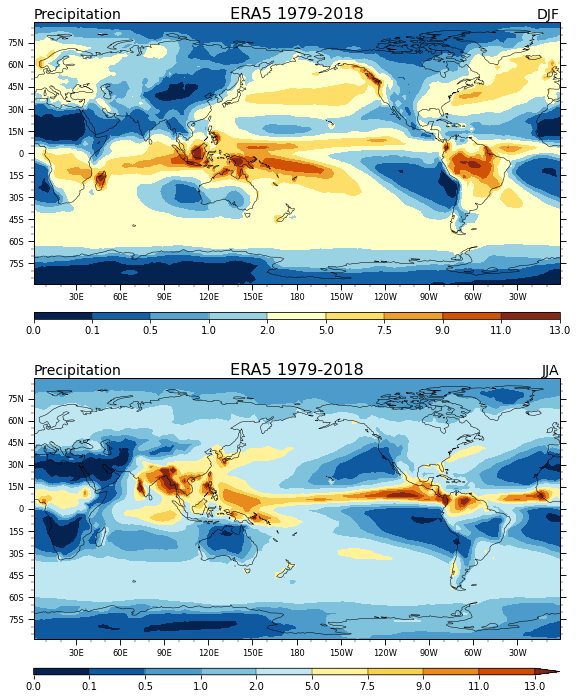

In [20]:
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'Precipitation'
color_map=BYR
cont1 = [0.0,0.1,0.5,1.0,2.0,5.0,7.5,9.0,11.0,13.0]
cont2=cont1
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
handle=zmap.xmap(UWmean, cont1, pro, ax=ax[0], Special_Value = 9999.,zeroline=False,\
                       maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.add_colorbar(fig, handle['filled'], ax[0], colorbar_size=0.01,label_size=10,edges=True)
han1=zmap.xmap(USmean, cont2, pro, ax=ax[1], Special_Value = 9999.,zeroline=False,\
                        maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
zmap.add_colorbar(fig, han1['filled'], ax[1], colorbar_size=0.01,label_size=10,edges=True)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('TPREP.pdf')
plt.show()

In [21]:
UW=era.read_dataset(dataset='ERA5',var='U',level='850',season='DJF',verbose=False)
US=era.read_dataset(dataset='ERA5',var='U',level='850',season='JJA',verbose=False)
UW = UW.U.mean(dim='time')
US = US.U.mean(dim='time')
VW=era.read_dataset(dataset='ERA5',var='V',level='850',season='DJF',verbose=False)
VS=era.read_dataset(dataset='ERA5',var='V',level='850',season='JJA',verbose=False)
TS=era.read_dataset(dataset='ERA5',var='T',level='850',season='JJA',verbose=False)
TW=era.read_dataset(dataset='ERA5',var='T',level='850',season='DJF',verbose=False)
VW = VW.V.mean(dim='time')
VS = VS.V.mean(dim='time')
TS = TS.T.mean(dim='time')-273.16
TW = TW.T.mean(dim='time')-273.16

 Opening figure , 2 rows and 1 cols 

DataArray


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/vector_transform.py:140: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  
DataArray


/Users/antonionavarra/anaconda3/envs/GEOCAT/lib/python3.7/site-packages/cartopy/vector_transform.py:140: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


 Plotting with x limits (-180.0, 179.75)  
 Plotting with y limits (-90.0, 90.0)  


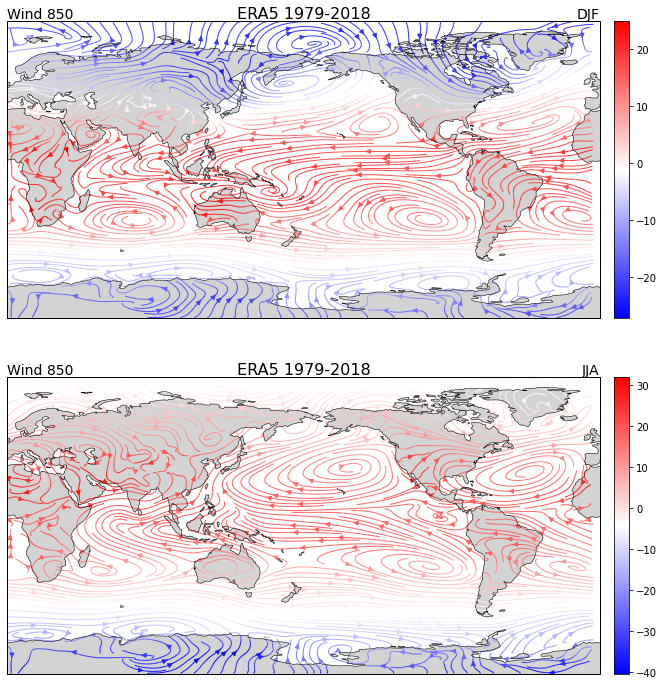

In [22]:
# Plot Stream Functions
bigtit = 'ERA5 1979-2018'
right1='DJF'
right2='JJA'
left1 = 'Wind 850'
color_map='bwr'
fig,ax,pro=zmap.init_figure(2,1,'Pacific', constrained_layout=False, figsize=(24,12))
zmap.xstmap(UW, VW,  color=TW, ax=ax[0],density=3, colorbar=True, \
              maintitle=bigtit, lefttitle=left1,righttitle=right1,cmap=color_map)
zmap.xstmap(US, VS,  color=TS, ax=ax[1],density=3, colorbar=True, \
              maintitle=bigtit, lefttitle=left1,righttitle=right2,cmap=color_map)
fig.subplots_adjust(wspace=0,hspace=0.2)
# Add horizontal colorbar
plt.savefig('Wind850.pdf')
plt.show()